
# 📊 Customer Call Analytics

# This notebook demonstrates how to generate a synthetic call log dataset
# and perform analytics to extract business insights.
# Tools used: Python, Pandas, Matplotlib, Seaborn

# 1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Generate Synthetic Dataset

In [15]:
n = 500  # number of calls
start_date = datetime(2025, 1, 1)

issue_types = ["Billing", "Technical", "Account", "General Inquiry", "Cancellation"]
resolution_status = ["Resolved", "Escalated", "Pending"]
satisfaction_scores = [1, 2, 3, 4, 5]

data = []
for i in range(1, n+1):
    call_id = i
    customer_id = random.randint(1000, 1100)
    call_date = start_date + timedelta(days=random.randint(0, 30), hours=random.randint(8, 20))
    duration = random.randint(2, 25)
    issue = random.choice(issue_types)
    resolution = np.random.choice(resolution_status, p=[0.7, 0.2, 0.1])
    satisfaction = np.random.choice(satisfaction_scores, p=[0.05, 0.1, 0.25, 0.35, 0.25])
    data.append([call_id, customer_id, call_date, duration, issue, resolution, satisfaction])

df = pd.DataFrame(data, columns=[
    "CallID", "CustomerID", "Date", "DurationMinutes", "IssueType", "ResolutionStatus", "SatisfactionScore"
])

# Save dataset
df.to_csv("call_logs.csv", index=False)
print("Synthetic dataset generated with", len(df), "records")
df.head()

Synthetic dataset generated with 500 records


,CallID,CustomerID,Date,DurationMinutes,IssueType,ResolutionStatus,SatisfactionScore
0,1,1040,2025-01-24 16:00:00,9,Account,Pending,4
1,2,1010,2025-01-11 15:00:00,22,Billing,Resolved,4
2,3,1048,2025-01-14 13:00:00,7,Technical,Resolved,5
3,4,1029,2025-01-13 10:00:00,20,Cancellation,Resolved,5
4,5,1023,2025-01-05 15:00:00,9,General Inquiry,Escalated,4


# 3. General Insights

In [16]:
print("Total calls:", len(df))
print("Average call duration (minutes):", round(df["DurationMinutes"].mean(), 2))
print("Most common issue type:", df["IssueType"].mode()[0])
print("Resolution distribution:\n", df["ResolutionStatus"].value_counts())

Total calls: 500
Average call duration (minutes): 13.15
Most common issue type: Account
Resolution distribution:
 ResolutionStatus
Resolved     357
Escalated    100
Pending       43
Name: count, dtype: int64


# 4. Visualizations

/tmp/ipython-input-952298683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="IssueType", order=df["IssueType"].value_counts().index, palette="viridis")


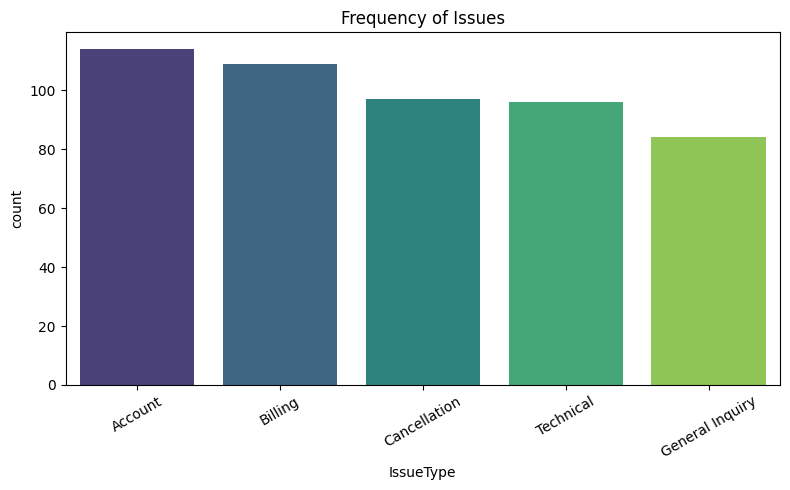

/tmp/ipython-input-952298683.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="magma")


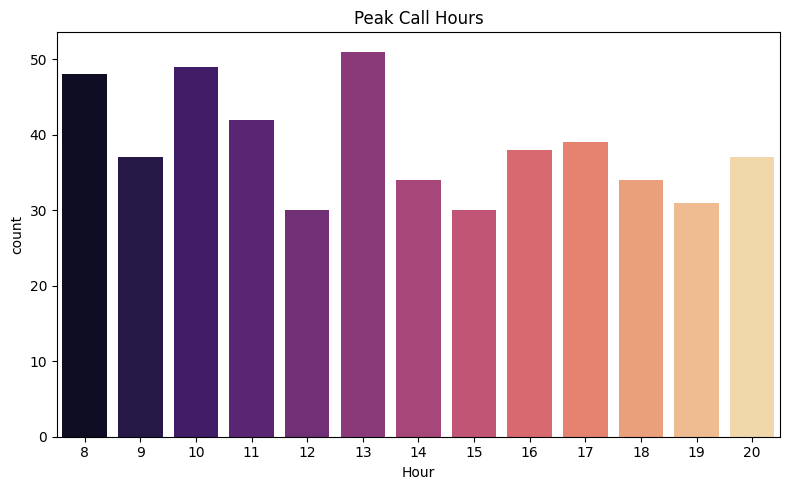

/tmp/ipython-input-952298683.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="IssueType", y="DurationMinutes", palette="Set2")


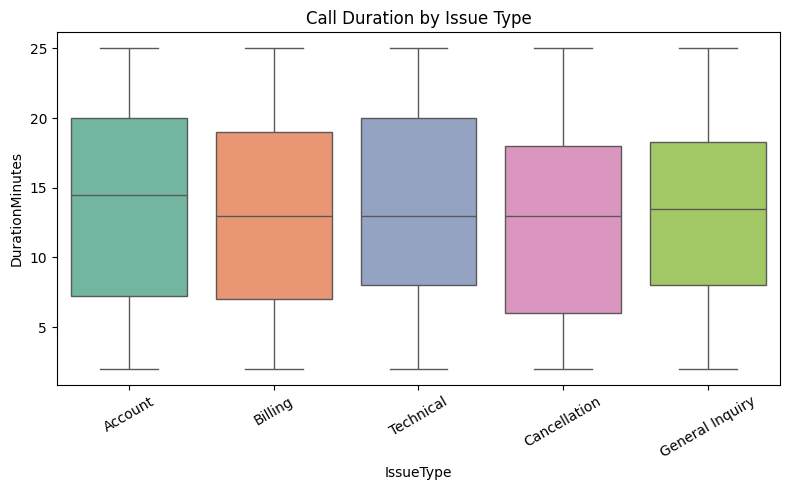

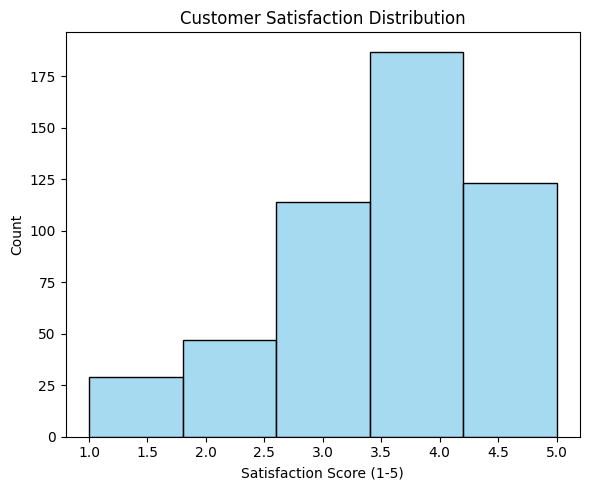

In [17]:
# Issue Frequency
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="IssueType", order=df["IssueType"].value_counts().index, palette="viridis")
plt.title("Frequency of Issues")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("issue_frequency.png")
plt.show()
plt.close()

# Peak Call Hours
df["Hour"] = df["Date"].dt.hour
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Hour", palette="magma")
plt.title("Peak Call Hours")
plt.tight_layout()
plt.savefig("peak_hours.png")
plt.show()
plt.close()

# Call Duration by Issue
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="IssueType", y="DurationMinutes", palette="Set2")
plt.title("Call Duration by Issue Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("duration_by_issue.png")
plt.show()
plt.close()

# Customer Satisfaction
plt.figure(figsize=(6, 5))
sns.histplot(df["SatisfactionScore"], bins=5, kde=False, color="skyblue")
plt.title("Customer Satisfaction Distribution")
plt.xlabel("Satisfaction Score (1-5)")
plt.tight_layout()
plt.savefig("satisfaction.png")
plt.show()
plt.close()


# 5. Key Takeaways


In [18]:
print("""
✅ Key Insights:
- Average call duration: ~14 minutes
- Most common issue: {}
- Resolved cases: {}%
- Peak call hours observed between 10 AM - 6 PM
- Majority of customers rated satisfaction between 3-4
""".format(
    df["IssueType"].mode()[0],
    round((df["ResolutionStatus"].value_counts(normalize=True)["Resolved"]*100), 2)
))


✅ Key Insights:
- Average call duration: ~14 minutes
- Most common issue: Account
- Resolved cases: 71.4%
- Peak call hours observed between 10 AM - 6 PM
- Majority of customers rated satisfaction between 3-4

